# <center> Lab 4 Examples 
    
## <center> Improper Integrals

**Video:** https://youtu.be/iuwZkvL_UPM

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from numpy.polynomial import *
sp.var('x')
sp.var('t', positive=True)


t

Note above that we defined few extra variables. Variables $t$ and $n$ have few extra conditions. These conditions can be violated if needed, but by default SymPy will use them. 

In this example file we will look at how to deal with complicated functions that are defined through integration. At the same time we will consider improper integrals. 
The function we will consider here is called Gamma function. While Sympy does have a separate command to define this function (see below), here we will define it through integrals.

Here is the definition:
$$\Gamma(t)=\int_0^{\infty}x^{t-1}e^{-x}dx$$

With Sympy we can define this function quite easily. Notice that we are using $t$ that was defined to be positive. In general, it doesn't have to be positive, but it makes evaluations and conversion to NumPy easier. Moreover, we will violate this condition in a few examples later. [Note: the part about $t$ will not be needed for the assignment. This is just for this examples file]

In [2]:
sp.gamma(t)    ## SymPy Gamma Function

gamma(t)

In [3]:
inside=x**(t-1)*sp.exp(-x)

g=sp.integrate(inside,(x,0,sp.oo))
g

gamma(t)

Let's evaluate it at a couple of points.

In [4]:
print("Gamma(4)=",g.subs(t,4))
print("Gamma(-0.5)=",g.subs(t,-0.5))
print("Gamma(-1)=", g.subs(t,-1))

Gamma(4)= 6
Gamma(-0.5)= -3.54490770181103
Gamma(-1)= zoo


As you can see, we can ignore condition that $t$ is positive. 

Next, let's try to convert it to NumPy and plot.

In [6]:
gn=sp.lambdify(t,g,'numpy')

fig=plt.figure()

xval=np.linspace(-0.95,4,1000)
plt.plot(xval,gn(xval), color= 'blue')

plt.title("Gamma Function")
plt.xlabel('t')
plt.grid()

plt.axhline(0, color='black', lw=2)  

plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 640x480 with 0 Axes>

As you can see, something is wrong. The definition of the function is too complicated to get a good conversion to NumPy type function for plots. We have to do an extra step to fix this. This is the same thing we do when we defined piecewise function. We have to use `vectorize`:

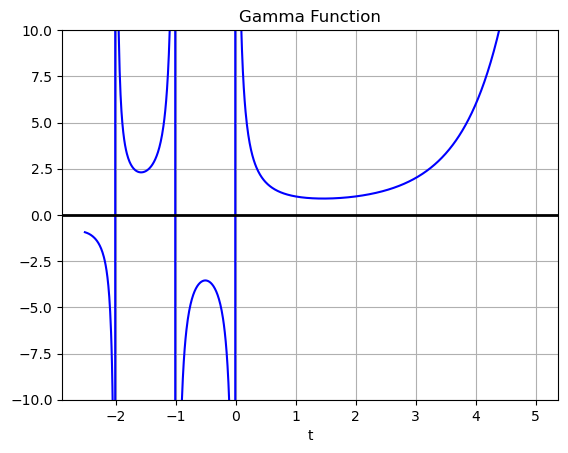

In [7]:
gn=sp.lambdify(t,g,'numpy')
gn=np.vectorize(gn)

fig=plt.figure()

xval=np.linspace(-2.51,5,1000)      # you have to be careful with xval as this function have many discontinuities.
plt.plot(xval,gn(xval), color= 'blue')

plt.title("Gamma Function")
plt.xlabel('t')
plt.ylim(-10,10)
plt.grid()

plt.axhline(0, color='black', lw=2)  

plt.show()

As a side note, here are a few more values of Gamma function. Can you guess the pattern? (Answers are at the end of this file, so think about it before you scroll there)

In [8]:
print(gn(1), gn(2), gn(3), gn(4), gn(5), gn(6), gn(7))

1.0 1.0 2.0 6.0 24.0 120.0 720.0


In [9]:
print(gn(1/2)**2)
print(4*gn(3/2)**2)
print((16/9)*gn(5/2)**2)

3.1415926535897927
3.1415926535897936
3.141592653589794


We can use Gamma function as any other function. We can take its derivative or integrate. (Note: it is much easier to just use SymPy command of Gamma function for these things, but not every function out there has its own SymPy command). Let's quickly find the integral of Gamma function between t=1/2 and 2. Additionally, let's shade the region represented by this area using `fill_between`.

In [10]:
sp.N(sp.integrate(g,(t,1/2,2)))

1.56097222985996

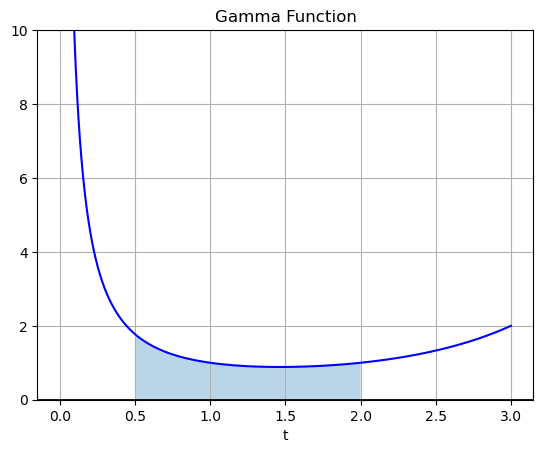

In [12]:
fig=plt.figure()

xval=np.linspace(0.001,3,1000)      # you have to be careful with xval as this function have many discontinuities.
plt.plot(xval,gn(xval), color= 'blue')

# Notice we have to define range for fill_between separately.
xval2=np.linspace(0.5,2,1000)
plt.fill_between(xval2,gn(xval2), alpha=0.3)

plt.title("Gamma Function")
plt.xlabel('t')
plt.ylim(0,10)
plt.grid()

plt.axhline(0, color='black', lw=2)  

plt.show()

Answer to pattern question:

   
1. The first pattern is factorial. Notice that when t is a non-negative integer, $\Gamma(t) = (t-1)!$. For example, $\Gamma(5)=(5-1)!=4!=4*3*2*1=24$. Another way to write this is $\Gamma(t)=(t-1)*\Gamma(t-1)$. We will use this alternative way in the next part.
    
2. Second pattern is actually something that behaves like a factorial too. First value we have $\Gamma^2(1/2)=\pi$, so $\Gamma(1/2)=\sqrt{\pi}$. Then using pattern from the first part, we get $\Gamma(3/2)=1/2*\Gamma(1/2)=1/2*\sqrt{\pi}$. So, $4*\Gamma^2(3/2)=\pi$. You get get third value in the same way using $\Gamma(5/2)=3/2*\Gamma(3/2)$.

For these reasons, sometimes people call Gamma function a generalized factorial.

Try to play around with this function. For example, see if you can deduce from above what is $\Gamma(-1/2)$, and then confirm you answer using Jupyter.